# **Part 3: Unsupervised Learning: Dimensionality Reduction**

**Unsupervised Learning** addresses a different sort of problem. Unsupervised Learning is best used to finding similarities between the objects in our dataset. The data does not need to be labelled to be used in an unsupervised learning model. In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.

Unsupervised learning comprises tasks such as **dimensionality reduction**, **clustering**, and
**density estimation**. For example, in the Iris data discussed previously, we can use unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to simplify complex data, and then these features can be used within a supervised framework.

References: https://www.ibm.com/topics/unsupervised-learning

## **Setting up our Notebook**

In this notebook, we will focus on using dimensionality reduction algorithms for maching a machine vision algorithm.

Run the setup code below and lets get started!

In [1]:
# Numpy and Pandas modules.
import numpy as np
import pandas as pd

# Plotly and Matplotlib for plotting.
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
%matplotlib inline
plt.style.use('seaborn')

# Download and install packages that will be helpful for this section.
%pip install -q ipywidgets
!apt-get -qq install subversion
!svn checkout https://github.com/geoffreyweal/MESA_Bootcamp_2023_ML_Tutorial/trunk/Notebooks/figure_code

# Clear the output just for this cell cause there is a lot going on and doesnt help us.
# Comment this out if there is a problem when loading the programs and packages above
from IPython.display import clear_output
clear_output()

## **Creating a Machine Vision Model for Numbers**

### **Inspecting and Visualising the Numbers Data**

For this exercise, we will create a machine learning model that can identify a number that has been written by a human.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

Let's plot some of the numbers that have been given in this dataset. The numbers in the dataset are represented by an 8x8 grid of pixels:

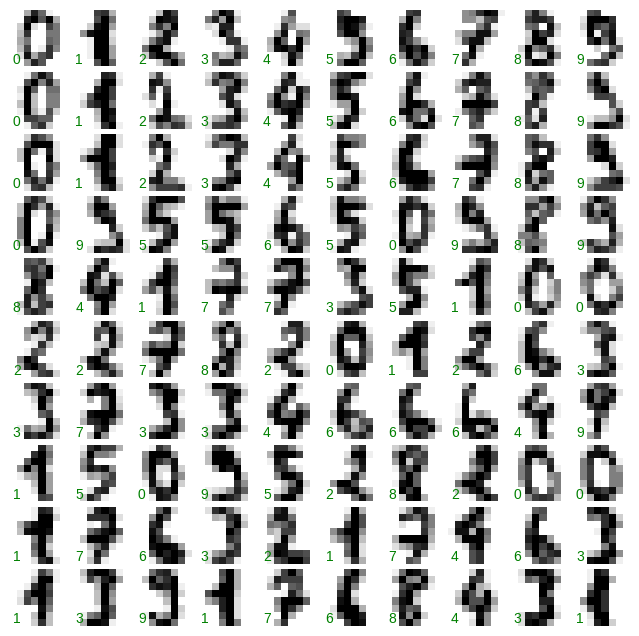

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

We can see how the raw data naturally gives itself to pictorially describe the numbers by looking at the raw data for one of the numbers below:

In [4]:
# Choose an index from the images and targe list to show:
index = 10 # feel free to change this between 0 and 1796

# The images themselves.
print('------------------------------------')
print('Data for setting pixels for the number image sampled')
print(digits.images[index])

# The target label, what the numbers are.
print('------------------------------------')
print('Shows that each number that the image above is trying to describe')
print(digits.target[index])
print('------------------------------------')

------------------------------------
Data for setting pixels for the number image sampled
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
------------------------------------
Shows that each number that the image above is trying to describe
0
------------------------------------


You can probably see that the 8x8 raw pixel data seems to give the shape of a zero.

The code below shows that we have 1797 samples in our dataset, where each number is described with 64 pixels (8 pixels by 8 pixels). We therefore say that our feature space contains 64 dimensions, where each dimension is the shade (blackness) of each pixel in the image.

In [5]:
print(digits.images.shape)

(1797, 8, 8)


### **Dimensionality Reduction using the Principle Component Analysis (PCA) algorithm**

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions! Instead we'll reduce the dimensions to 2, using an unsupervised method called the Principle Component Analysis (PCA) algorithm.

The PCA algorithm works by determining how to transform the data to maximise the variance between points in the dataset. See https://en.wikipedia.org/wiki/Principal_component_analysis for more information about the PCA algorithm.

Lets try out the PCA algorithm on our digits data below:


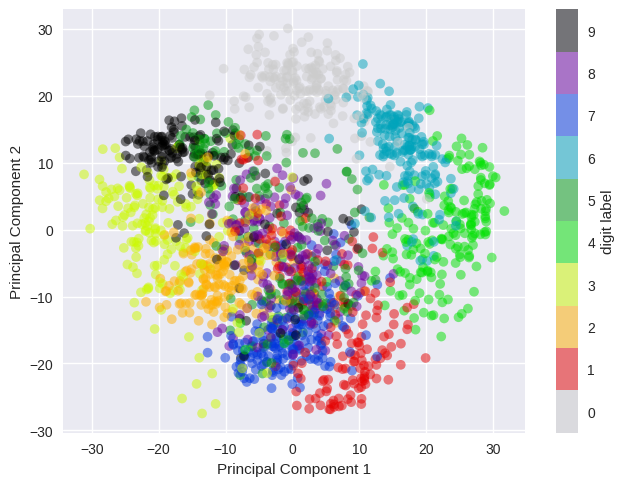

In [6]:
# Initialise the PCA model in python.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Perform the PCA algorithm upon our dataset.
data_projected = pca.fit_transform(digits.data)

# Plot the data that has been spreadout using the PCA.
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.colormaps.get_cmap('nipy_spectral_r').resampled(10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

We can see that our PCA model is doing a reasonable job at spreading out the data, and gives regions of the above plots where we would find each of our numbers.

### **Classification on Digits: Adding a Supervised-Learning Algorithm**

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample. Here, we will split our data into 70% for training and 30% for testing (validation):

In [7]:
from sklearn.model_selection import train_test_split

# Split our dataset into a training set and a testing set.
Xtrain, Xtest, ytrain, ytest, indices_train, indices_test = train_test_split(data_projected, digits.target, range(len(digits.target)), train_size=0.7, random_state=69)
print('Number of data in the training set: '+str(Xtrain.shape[0]))
print('Number of data in the testing set:  '+str(Xtest.shape[0]))

Number of data in the training set: 1257
Number of data in the testing set:  540


We can now use the results from the PCA algorithm to train a supervised classification machine learning algorithm. Here, we will use the C-Support Vector Classification (SVC) algorithm. We won't go into what this machine learning algorithm is doing, just to say it is a commonly used supervised classification machine learning algorithm that works very well in many applications:

In [8]:
# Initialise the support vector classification algorithm in python.
# Will include KNN algorithm here to see that no big change has happened
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ml_algorithm = KNeighborsClassifier(n_neighbors=5)
ml_algorithm = SVC(C=100)

# Train our dataset with the traning dataset that has been modified by the PCA algorithm.
ml_algorithm.fit(Xtrain, ytrain)

# Make predictions for our testing dataset.
ypred = ml_algorithm.predict(Xtest)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [9]:
from sklearn.metrics import accuracy_score

# Compare the results from our predictions with what the number actually is.
print('accuracy score: '+str(accuracy_score(ytest, ypred)))

accuracy score: 0.6444444444444445


This accuracy number is great, but it doesn't tell us **where** we've gone wrong (i.e. which predictions of numbers it is getting wrong).

One nice way to do this is to use the *confusion matrix*. Below shows a confusion matrix with colours to guide where our ML model is working well and where is it getting "confused".

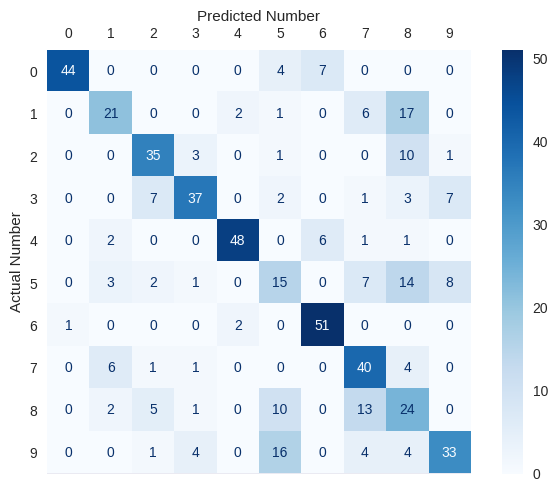

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Version with colour

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
labels = sorted(set(ytest.tolist() + ypred.tolist()))
cm = confusion_matrix(ytest, ypred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Number')
plt.xlabel('Predicted Number')
plt.yticks(range(10))
plt.xticks(range(10))
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

In [11]:
# @title <p> (Here is the code to show the confusion cell without colour if desired. It is hidden, but you can unhide the code by clicking on the black triangle symbol ▶ to the left of this paragraph)</p>
# Version without colour

""" # remove these three quote symbols to run this code

# Create the confusion matrix between the PCA+SVC predictions and the actual results we expect.
confmat = (confusion_matrix(ytest, ypred))

# Create a spreadsheet showing the results of the confusion matrix.
df = pd.DataFrame(data=confmat, columns=range(len(confmat)), index=range(len(confmat)))
overall_df = pd.DataFrame(
    df.values,
    pd.MultiIndex.from_product([['Actual Numbers'], df.index]),
    pd.MultiIndex.from_product([['Predicted Numbers'], df.columns])
)
overall_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(overall_df)

# This will display the total number of samples in the train set that will be included in the confusion matrix.
#total = sum([sum(df[index]) for index in range(len(df))])
#print('Total number of testing set samples: '+str(total))

""" # remove these three quote symbols to run this code
print()

As you can see below, it looks like our simple PCA+SVM machine learning algorithms are working ok.

We can also take a look at some of the outputs along with their predicted labels.
* Successful predictions have been marked with <font color="green">green</font>.
* Unsuccessful predictions have been marked with <font color="red">red</font>.

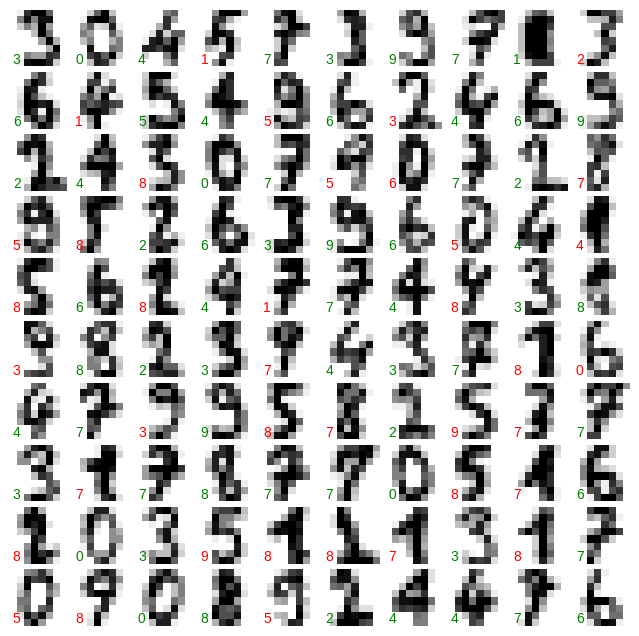

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[indices_test[i]], cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]), transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])
fig.show()

### **Changing the Dimensionality of your PCA Model**

We can see that the PCA algorithm is able to separate the data pretty well into 2 dimensions. We could improve the separation by reducing the dimensionality of the feature vector into 3 dimensions rather than 2. Maybe this could improve our PCA+SVM ML model?

To begin, lets look at the PCA data when given 3 dimensions by running the code below:

In [13]:
# Initialise the PCA algorithm that will spread the data into 3 dimensions.
pca = PCA(n_components=3)

# Perform the PCA algorithm upon our dataset.
data_projected = pca.fit_transform(digits.data)

# Show the dataset that has been spread out with the PCA algorithm in 3 dimensions
# with a 3D scatterplot.
data = data_projected.tolist()
for index in range(len(data)):
    target = digits.target[index]
    data[index] = data[index] + [str(target)]
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3', 'number'])
cmap = plt.colormaps.get_cmap('nipy_spectral_r').resampled(10)
color_discrete_map = {str(target): rgb2hex(cmap(target)).upper() for target in range(0,10)}
fig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color='number', color_discrete_map=color_discrete_map, width=1000, height=1000)
fig.show()

Try training your ML model with different values of ``n_components`` for the PCA algorithm and see how well your accuracy improves.

``n_components`` can be set between 1 and 64 (64 is the maximum number of feature vectors our data contains, where each image has 64 pixels).

Accuracy Score: 0.37407407407407406



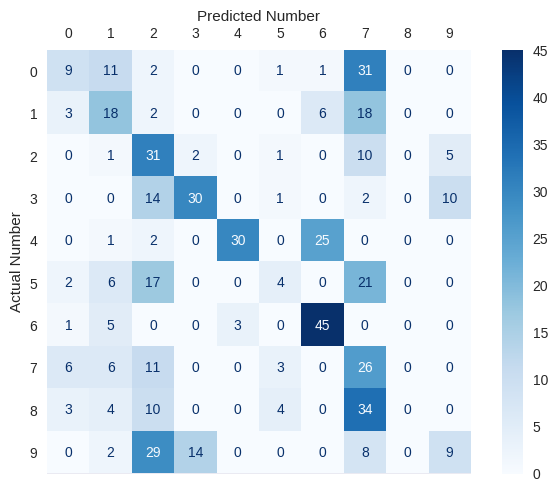

In [14]:
# Set up your PCA algorithm that will spread out your data in the number of dimensions you desire.
pca = PCA(n_components=1) # <== Change this number and see how the accuracy changes.
data_projected = pca.fit_transform(digits.data)

# Separate your data into a training set (70 %) and a testing set (30 %).
Xtrain, Xtest, ytrain, ytest, indices_train, indices_test = train_test_split(data_projected, digits.target, range(len(digits.target)), train_size=0.7, random_state=69)

# Initialise the support vector classification algorithm in python.
#ml_algorithm = KNeighborsClassifier(n_neighbors=5)
ml_algorithm = SVC(C=100)

# Train our dataset with the traning dataset that has been modified by the PCA algorithm.
ml_algorithm.fit(Xtrain, ytrain)

# Make predictions for our testing dataset.
ypred = ml_algorithm.predict(Xtest)

# Compare the results from our predictions with what the number actually is.
print('Accuracy Score: '+str(accuracy_score(ytest, ypred)))
print()

# --------------------------------------------------------------------------
# Create a spreadsheet showing the results of the confusion matrix.
overall_df = pd.DataFrame(
    df.values,
    pd.MultiIndex.from_product([['Actual Numbers'], df.index]),
    pd.MultiIndex.from_product([['Predicted Numbers'], df.columns])
)
overall_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
#display(overall_df) # If you want to see the confusion matrix without colour, uncomment this out.
# --------------------------------------------------------------------------

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(ytest.tolist() + ypred.tolist()))
cm = confusion_matrix(ytest, ypred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Number')
plt.xlabel('Predicted Number')
plt.yticks(range(10))
plt.xticks(range(10))
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

We can plot all the accuracy scores for all possible number of components, and used this to determine a good value for ``n_components``:

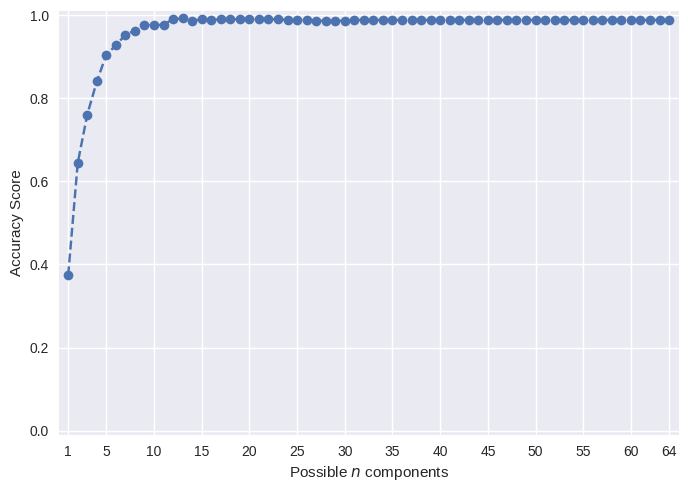

In [15]:
# Set up lists for recording data.
all_n_components    = list(range(1,64+1))
all_accuracy_scores = []

for n_components in all_n_components:

  # Set up your PCA algorithm that will spread out your data in the number of dimensions you desire.
  pca = PCA(n_components=n_components)
  data_projected = pca.fit_transform(digits.data)

  # Separate your data into a training set (70 %) and a testing set (30 %).
  Xtrain, Xtest, ytrain, ytest, indices_train, indices_test = train_test_split(data_projected, digits.target, range(len(digits.target)), train_size=0.7, random_state=69)

  # Initialise the support vector classification algorithm in python.
  #ml_algorithm = KNeighborsClassifier(n_neighbors=5)
  ml_algorithm = SVC(C=100)

  # Train our dataset with the traning dataset that has been modified by the PCA algorithm.
  ml_algorithm.fit(Xtrain, ytrain)

  # Make predictions for our testing dataset.
  ypred = ml_algorithm.predict(Xtest)

  # Compare the results from our predictions with what the number actually is.
  score = accuracy_score(ytest, ypred)

  all_accuracy_scores.append(score)

# Plot the acccuracy scores across all the possible n components
plt.plot(all_n_components, all_accuracy_scores, 'o--');
plt.ylim((-0.01,1.01))
plt.xlim((0,65))
plt.xticks([1]+list(range(5,65,5))+[64])
plt.xlabel(r'Possible $n$ components')
plt.ylabel('Accuracy Score')
plt.show()

Also have a look at the results your set for your numbers and see how they change as you change the dimensionality of the PCA algorithm

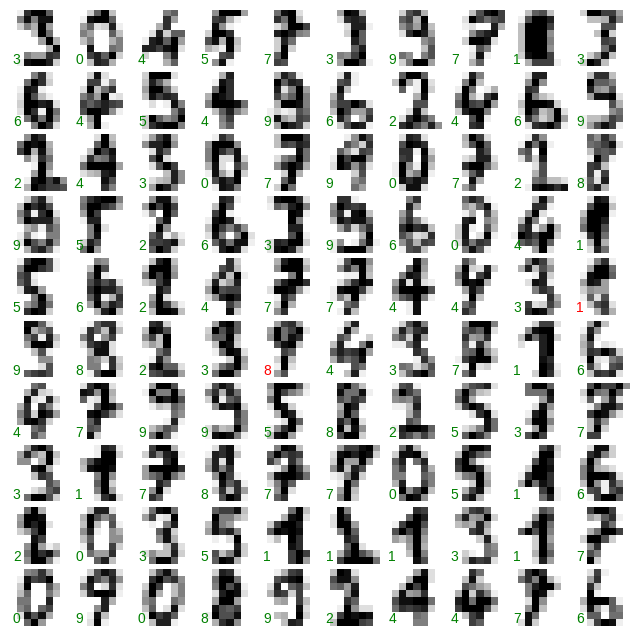

In [16]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[indices_test[i]], cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])
fig.show()

### **Try out other Unsupervised ML algorithms**

Often, it is desirable to try a bunch of different unsupervised (and supervised) ML algorithms to figure out which algorithms are best for your problem/application.

Try out the following unsupervised algorithms and figure out which one will be the best classifying digits from looking at the plots.

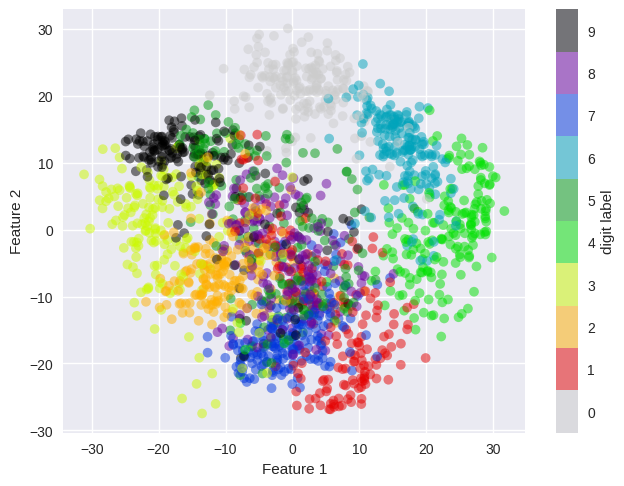

In [17]:
# Get the different types of unsupervised machine learning models from Scikit-Learn.
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

# -----------------------------------------------------------------------------------------------
# Comment and uncomment out the following unsupervised ML models to try them out.
unsupervised_model = PCA(n_components=2)
#unsupervised_model = Isomap(n_components=2)
#unsupervised_model = TSNE(n_components=2,random_state=42) # We dont need to set ``random_state`` to 42, this will just allow us to compare results between people for teaching purposes.
# -----------------------------------------------------------------------------------------------

# Use our unsupervised model to spread out our dataset in 2 dimensions.
reduced_dimension_data = unsupervised_model.fit_transform(digits.data)

# Assign colours to each number we want our algorithm to recognise.
cmap = plt.colormaps.get_cmap('nipy_spectral').resampled(10)

# Plot the data in 2 dimensions.
plt.scatter(reduced_dimension_data[:, 0], reduced_dimension_data[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.colormaps.get_cmap('nipy_spectral_r').resampled(10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

Confirm how well you think each unsupervised ML algorithm is working by running the code below for each unsupervised ML algorithm.

accuracy score: 0.6444444444444445



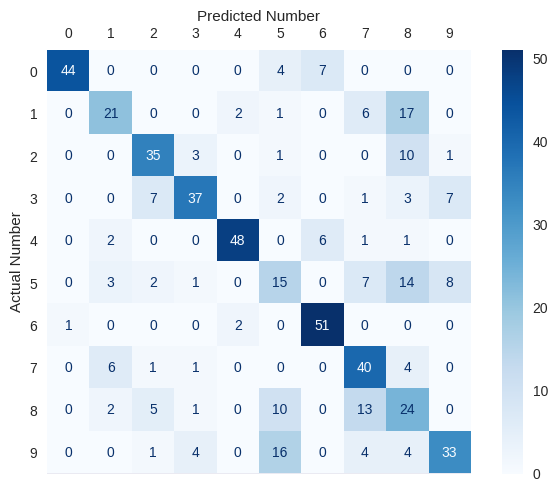

In [18]:
# -----------------------------------------------------------------------------------------------
# Comment and uncomment out the following unsupervised ML models to try them out.
unsupervised_model = PCA(n_components=2)
#unsupervised_model = Isomap(n_components=2)
#unsupervised_model = TSNE(random_state=42) # We dont need to set ``random_state`` to 42, this will just allow us to compare results between people for teaching purposes.
# -----------------------------------------------------------------------------------------------

# use fit_transform instead of fit, as TSNE and Isomap has no transform method.
reduced_dimension_data = unsupervised_model.fit_transform(digits.data)

# Separate your data into a training set (70 %) and a testing set (30 %).
Xtrain, Xtest, ytrain, ytest, indices_train, indices_test = train_test_split(reduced_dimension_data, digits.target, range(len(digits.target)), train_size=0.7, random_state=69)

# Initialise the support vector classification algorithm in python.
#ml_algorithm = KNeighborsClassifier(n_neighbors=5)
ml_algorithm = SVC(C=100)

# Train our dataset with the traning dataset that has been modified by the PCA algorithm.
ml_algorithm.fit(Xtrain, ytrain)

# Make predictions for our testing dataset.
ypred = ml_algorithm.predict(Xtest)

# Compare the results from our predictions with what the number actually is.
print('accuracy score: '+str(accuracy_score(ytest, ypred)))
print()

# Create a spreadsheet showing the results of the confusion matrix.
overall_df = pd.DataFrame(
    df.values,
    pd.MultiIndex.from_product([['Actual Numbers'], df.index]),
    pd.MultiIndex.from_product([['Predicted Numbers'], df.columns])
)
overall_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
#display(overall_df)

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(ytest.tolist() + ypred.tolist()))
cm = confusion_matrix(ytest, ypred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Number')
plt.xlabel('Predicted Number')
plt.yticks(range(10))
plt.xticks(range(10))
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

You can also look at how your ML model is classifying each digit.

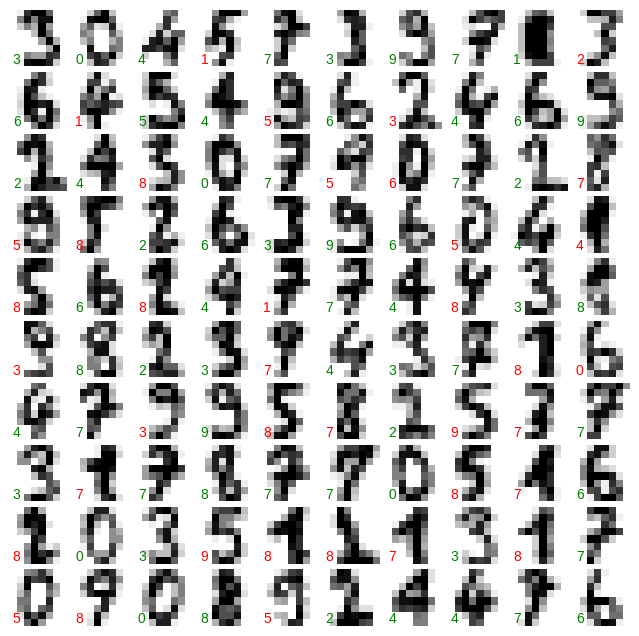

In [19]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[indices_test[i]], cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])
fig.show()

**EXTRA IF YOU FINISH EARLY**: Repeat what we have just done using the kNN algorithm below. Try editting the code below to achieve this

accuracy score: 0.6444444444444445



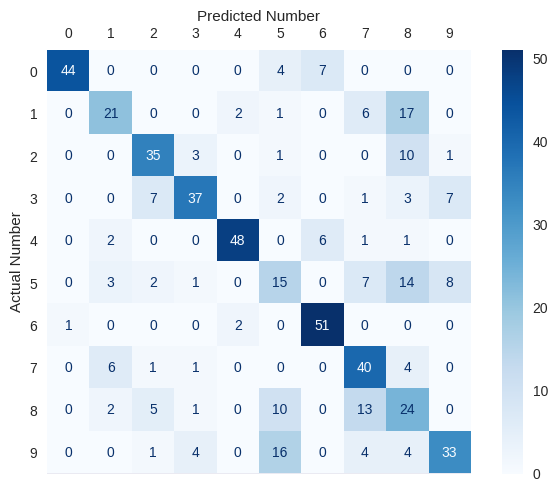

In [20]:
# -----------------------------------------------------------------------------------------------
# Comment and uncomment out the following unsupervised ML models to try them out.
unsupervised_model = PCA(n_components=2)
#unsupervised_model = Isomap(n_components=2)
#unsupervised_model = TSNE(random_state=42) # We dont need to set ``random_state`` to 42, this will just allow us to compare results between people for teaching purposes.
# -----------------------------------------------------------------------------------------------

# use fit_transform instead of fit, as TSNE and Isomap has no transform method.
reduced_dimension_data = unsupervised_model.fit_transform(digits.data)

# Separate your data into a training set (70 %) and a testing set (30 %).
Xtrain, Xtest, ytrain, ytest, indices_train, indices_test = train_test_split(reduced_dimension_data, digits.target, range(len(digits.target)), train_size=0.7, random_state=69)

# Initialise the kNN algorithm in python (Add your code in here).


# Train our dataset with the traning dataset that has been modified by the PCA algorithm (Add your code in here).


# Make predictions for our testing dataset (Add your code in here).


# Compare the results from our predictions with what the number actually is.
print('accuracy score: '+str(accuracy_score(ytest, ypred)))
print()

# Create a spreadsheet showing the results of the confusion matrix.
overall_df = pd.DataFrame(
    df.values,
    pd.MultiIndex.from_product([['Actual Numbers'], df.index]),
    pd.MultiIndex.from_product([['Predicted Numbers'], df.columns])
)
overall_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
#display(overall_df)

# Showing the results of the confusion matrix with colours. The darker the colour, the greater the number.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = sorted(set(ytest.tolist() + ypred.tolist()))
cm = confusion_matrix(ytest, ypred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.grid(False)
plt.ylabel('Actual Number')
plt.xlabel('Predicted Number')
plt.yticks(range(10))
plt.xticks(range(10))
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()